## DATA UNDERSTANDING

### Description of columns in the file:

[age] is an integer from 0 to 116, indicating the age

[gender] is either 0 (male) or 1 (female)

[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [1]:
#importing libraries
import os # to access files in the opereating system
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
#Accessing all image file names to get ages
utkface_path = ('data/UTKFace')
utkface_image_names = os.listdir(utkface_path)
utkface_image_names

['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg',
 '100_1_0_20170110183726390.jpg.chip.jpg',
 '100_1_0_20170112213001988.jpg.chip.jpg',
 '100_1_0_20170112213303693.jpg.chip.jpg',
 '100_1_0_20170112215032192.jpg.chip.jpg',
 '100_1_0_20170117195420803.jpg.chip.jpg',
 '100_1_0_20170119212053665.jpg.chip.jpg',
 '100_1_2_20170105174847679.jpg.chip.jpg',
 '100_1_2_20170112213615815.jpg.chip.jpg',
 '100_1_2_20170112222336458.jpg.chip.jpg',
 '101_0_0_20170112213500903.jpg.chip.jpg',
 '101_1_2_20170105174739309.jpg.chip.jpg',
 '103_0_2_20170112213001988.jpg.chip.jpg',
 '105_0_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213001988.jpg.chip.jpg',
 '105_1_0_20170112213021902.jpg.chip.jpg',
 '105_1_0_20170112213507183.jpg.chip.jpg',
 '105_1_1_20170112213303693.jpg.chip.jpg',
 '10_0_0_20161220222308131.jpg.chip.jpg',
 '10_0_0_20170103200329407.jpg.chip.jpg',
 '10_0_0_20170103200522151.jpg.chip.jpg',
 '10_0_0_20170103233459275.jpg.chip.jpg',
 '10_0_0_201701

In [3]:
# function to generate the labels from the image file names according to the format given above.

def age_gender_race_split(image_name):
    
    """ This function generates labels from the image file names"""

    image_labels = image_name.split('_')
    age = image_labels[0]
    gender = image_labels[1]
    race = image_labels[2]
    timestamp=image_labels[-1]
    

    return (age, gender, race, timestamp)
     

In [4]:
#using for loops to store labels in relevant arrays relevant 
age_labels = np.array([])
gender_labels = np.array([])
race_labels = np.array([])
timestamp_labels=np.array([])

for image in utkface_image_names:
    age, gender, race,timestamp = age_gender_race_split(image)
    age_labels = np.append(age_labels, age)
    gender_labels = np.append(gender_labels, gender)
    race_labels = np.append(race_labels, race)
    timestamp_labels=np.append(timestamp_labels, timestamp)

In [5]:
age = pd.Series(age_labels, name = 'Ages')
gender = pd.Series(gender_labels, name = 'Genders')
race = pd.Series(race_labels, name="Races")
timestamp=pd.Series(timestamp_labels, name="Timestamp")
df = pd.concat([age, race, gender, timestamp], axis=1)
df.head()

Ages Races Genders                       Timestamp
0  100     0       0  20170112213500903.jpg.chip.jpg
1  100     0       0  20170112215240346.jpg.chip.jpg
2  100     0       1  20170110183726390.jpg.chip.jpg
3  100     0       1  20170112213001988.jpg.chip.jpg
4  100     0       1  20170112213303693.jpg.chip.jpg

In [6]:
#getting value counts for Age column
age_counts=df['Ages'].value_counts()
age_counts

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: Ages, Length: 104, dtype: int64

In [7]:
#getting value counts for Race
race_counts=df['Races'].value_counts()
race_counts

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170116174525125.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
20170109150557335.jpg.chip.jpg        1
Name: Races, dtype: int64

We have noticed there are 3 rows that do not follow naming convention. We will handle this in Data preparation

In [8]:
gender_counts= df['Genders'].value_counts()
gender_counts

0    12391
1    11317
Name: Genders, dtype: int64

In [9]:
class DataUnderstanding(object):
    """This is a class that does basic data understanding"""
    def __init__(self, df):
        self.shape = df.shape
        self.info = df.info
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes


In [10]:
#instantiating the classes
dataund= DataUnderstanding(df)

In [11]:
#Getting the shape of the dataset
print(f"shape:{dataund.shape}")

shape:(23708, 4)


In [12]:
#getting the info of the data
print(dataund.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ages       23708 non-null  object
 1   Races      23708 non-null  object
 2   Genders    23708 non-null  object
 3   Timestamp  23708 non-null  object
dtypes: object(4)
memory usage: 741.0+ KB
None


we can see that the dataset contains 23708 rows and 3 columns.The 3 columns has data type  string.We can also see there are no null values.

In [13]:
#getting the missing values
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    0
dtype: int64

There are no missing values.

In [14]:
#checking the data types
dataund.types

Ages         object
Races        object
Genders      object
Timestamp    object
dtype: object

The 3 columns have object data type

In [15]:
#checking for duplicates
print(f"Duplictes:{dataund.duplicates.sum()}")

Duplictes:0


There are no duplicates this is attributed to the inclusion of date and time column.

## DATA PREPARATION

In [16]:
#dropping rows 
df = df[df.Races.isin(["0","1","2","3","4"])]
dataund= DataUnderstanding(df)
print(f"Shape:{dataund.shape}")


Shape:(23705, 4)


After dropping the three rows we have 23705 rows.

In [17]:
for time in timestamp:
  parts = time.split(".")
  date_time = parts[0]
  print(date_time)

20170112213500903
20170112215240346
20170110183726390
20170112213001988
20170112213303693
20170112215032192
20170117195420803
20170119212053665
20170105174847679
20170112213615815
20170112222336458
20170112213500903
20170105174739309
20170112213001988
20170112213001988
20170112213001988
20170112213021902
20170112213507183
20170112213303693
20161220222308131
20170103200329407
20170103200522151
20170103233459275
20170104013211746
20170110215927291
20170110220033115
20170110220111082
20170110220235233
20170110220251986
20170110220255346
20170110220316298
20170110220403810
20170110220447314
20170110220503946
20170110220514186
20170110220530650
20170110220539329
20170110220541850
20170110220546177
20170110220548521
20170110220557169
20170110220644705
20170110220654150
20170110221714752
20170110221719390
20170110221811823
20170110224223937
20170110224238891
20170110224253445
20170110224255796
20170110224402264
20170110224406532
20170110224416035
20170110224500062
20170110224524253
2017011022

20170109214241069
20170109214248716
20170109214251980
20170109214254732
20170109214309566
20170109214336149
20170109214453184
20170109214455239
20170109214503497
20170109214512153
20170109214527742
20170109214554528
20170109214557098
20170109214559082
20170109214601671
20170109214608184
20170109214610454
20170109214646809
20170109214700491
20170109214725387
20170109214726739
20170109214749825
20170109214752340
20170109214753528
20170109214813691
20170116211949605
20170116215643425
20170117133441179
20170117135753337
20170117135802544
20170117140252214
20170117140258008
20170117140331327
20170117140340105
20170117140343665
20170117140440920
20170117140504776
20170117140751537
20170117142633417
20170117150406531
20170117193303188
20170109212540841
20170109212551451
20170109214221868
20170109214355606
20170112231616704
20170113002913732
20170113005132350
20170113005321501
20170114030232014
20170114030253404
20170114030258171
20170114030334837
20170114030339628
20170114030424059
2017011600

20170112191230798
20170112191255227
20170112191323933
20170112192922677
20170112205029995
20170112230604949
20170112230742277
20170112231407182
20170112231413086
20170112231449708
20170112231738487
20170112231743279
20170112231744071
20170112231844733
20170113005339990
20170113005418295
20170113005427278
20170113005500606
20170113005503503
20170113195429469
20170114025540321
20170114030841465
20170114030919655
20170114031019426
20170114031112464
20170114031114934
20170114031116660
20170114031128316
20170116003433569
20170116162433766
20170116164052068
20170116214348718
20170116215855605
20170117132642224
20170117171757218
20170117195034455
20170103225030704
20170103234750663
20170104015622356
20170104015722028
20170104020257804
20170104020440101
20170104020725236
20170104020739364
20170104020820934
20170104021544485
20170108224234471
20170108224309241
20170109213154546
20170112003857668
20170116163800040
20170116163810477
20170116165621526
20170116170350603
20170116170358089
2017011617

20170103180035647
20170103180412080
20170103180414191
20170103180451856
20170103180518664
20170103180703224
20170103223610503
20170103223641295
20170103233631243
20170103234935189
20170104020712460
20170104021538021
20170104023208069
20170104165334721
20170104234542547
20170105002627948
20170105183727831
20170111182452759
20170112234027666
20170112234124928
20170112234126720
20170112234128328
20170112234202903
20170112234220808
20170112234244982
20170112234310143
20170112234313416
20170112234315344
20170112234331591
20170116173236417
20170116201840541
20170116211903141
20170116221713318
20170116221715630
20170116221717766
20170116221719806
20170116221809969
20170116221811019
20170116221811842
20170116221812669
20170116221813922
20170116221814613
20170116221815459
20170116221819522
20170116221827674
20170116221828462
20170116221829199
20170116221829961
20170116221851470
20170116222839270
20170117142807780
20170117144712244
20170117144727035
20170117144740562
20170117144757777
2017011714

20170117134530533
20170117134837758
20170117134947430
20170117135211463
20170117135646592
20170117135959687
20170117140138784
20170117140238688
20170117140418545
20170117140624359
20170117140853353
20170117140903569
20170117141331623
20170117141349705
20170117141421609
20170117141427897
20170117141719089
20170117141726361
20170117141803697
20170117142737553
20170117142757162
20170117142815331
20170117142855562
20170117142901203
20170117143830737
20170117143909681
20170117143916425
20170117143942122
20170117143946804
20170117143952249
20170117145120563
20170117145650515
20170117151341916
20170117151432922
20170117151946851
20170117152023187
20170117152038451
20170117152041619
20170117152143899
20170117152149428
20170117182558966
20170117190527852
20170117191541627
20170117193330822
20170117193539276
20170117195134252
20170117195136747
20170117195311260
20170117195319237
20170117195321747
20170117195324293
20170117195339173
20170117195346437
20170117195358981
20170117203811656
2017011720

20170117003314278
20170117005855768
20170117005859409
20170117091325822
20170117091431823
20170117091452417
20170117091502729
20170117091638287
20170117091649819
20170117091659319
20170117091743194
20170117091820820
20170117091834220
20170117094729864
20170117094755094
20170117103606667
20170117105735230
20170117105747119
20170117131041963
20170117144831027
20170117152442875
20170117152551661
20170117152609260
20170117152659255
20170117152703723
20170117152808211
20170117152955925
20170117153116669
20170117153202141
20170117153205725
20170117153211341
20170117153217757
20170117153717556
20170117154103821
20170117154814509
20170117154817805
20170117164030406
20170117170011666
20170117170217033
20170117170417131
20170117170847202
20170117171040563
20170117171130618
20170117171248386
20170117171418571
20170117171447434
20170117171512771
20170117171657311
20170117172636235
20170117173257366
20170117173532444
20170117173557316
20170117173613245
20170117173639429
20170117173648397
2017011717

20170103234115237
20170103235605244
20170103235712113
20170105164223948
20170109002629914
20170116154322277
20170116181035930
20170116220414012
20170117143809650
20170117152504299
20170117152642036
20170117152911110
20170117152921443
20170117153408062
20170117153657309
20170117153702405
20170117153828843
20170117153836846
20170117154047070
20170117154124606
20170117154131789
20170117154137164
20170117154150500
20170117154327501
20170117154432964
20170117154442702
20170117173903318
20170117174023997
20170117174054694
20170117174112221
20170117174153056
20170117174218966
20170117174256614
20170117174310909
20170117174316560
20170117174327119
20170117174505182
20170117174512949
20170117174527047
20170117174529702
20170117185535633
20170117195954341
20170117200105003
20170117200115644
20170117200208341
20170117200211019
20170117200213443
20170117200301221
20170117200341157
20170117200419213
20170117200442221
20170117201058830
20170117201351845
20170117201446708
20170117201452666
2017011720

20170116191639838
20170116192003103
20170116192106479
20170116192305668
20170116192600926
20170116192755650
20170116192959114
20170116222623761
20170117142716618
20170104192939143
20170104220307950
20170104221016727
20170104222837663
20170104223216158
20170104223241929
20170104223337415
20170104223430207
20170104223510151
20170104223537760
20170104223603809
20170104231422265
20170104231433217
20170104231509930
20170104231853785
20170104232440417
20170104232916497
20170104232946267
20170104235045746
20170109131950179
20170109132327888
20170109132749602
20170109132821495
20170109132916902
20170109133054332
20170109134902771
20170109140238810
20170109141400528
20170109142213006
20170116162504864
20170117141635345
20170117144207130
20170117180631161
20170117180646529
20170117180649497
20170117183503510
20170117184127794
20170117184807423
20170119144214613
20170119152713848
20170119154512882
20170119164514645
20170119194448739
20170119194459995
20170119194616045
20170119194821963
2017011919

20170117202819247
20170117202832830
20170117202840206
20170117202914440
20170117202929576
20170117204104479
20170120133906735
20170103180631960
20170103180858952
20170103182254417
20170103182413737
20170103182425185
20170103182948122
20170103183908075
20170104164947017
20170104165043953
20170104165921257
20170104170158777
20170104184950950
20170104185111694
20170104185704638
20170104192455647
20170104234753946
20170105162437811
20170105164713380
20170105165034356
20170105170137612
20170108225424420
20170109001620649
20170109012211696
20170109012829305
20170109141417666
20170116191315733
20170116191956794
20170116201303368
20170116211836902
20170116211841219
20170116214239576
20170116220523530
20170116220635092
20170116220947988
20170116222711779
20170116223846422
20170117000320312
20170117000354691
20170117091710631
20170117091918162
20170117092244399
20170117092552049
20170117092621461
20170117092656822
20170117092814966
20170117094404388
20170117103601281
20170117114647665
2017011711

20170112210455829
20170112210849669
20170112210929221
20170112211553429
20170112233308831
20170112235129592
20170113000321114
20170113000848177
20170113001132139
20170113001213379
20170113005238142
20170113011456750
20170113012052359
20170113161351324
20170114030609784
20170115234946456
20170116024027298
20170116024837534
20170116210318759
20170116215201422
20170116233604958
20170117014021084
20170117173927950
20170104022342934
20170104022951446
20170116191634811
20170104223525079
20170104232111402
20170104232231283
20170104235051234
20170104235523490
20170109132139583
20170109133043550
20170117174243837
20170117182600997
20170119164429486
20170119200543308
20170119200544140
20170103181754609
20170117174234414
20170117200817413
20170117201624958
20170103182629265
20170103182639105
20170104165555523
20170104170055225
20170104170059137
20170104170338177
20170104172731554
20170104173030290
20170104174028507
20170104181316780
20170104191711254
20170104192735655
20170104201652065
2017010420

20170103182736051
20170103182746666
20170103182759530
20170103183207120
20170103183453835
20170103230424865
20170104165401426
20170104165729457
20170104171631209
20170104171655778
20170104181321972
20170104181325301
20170104192826910
20170104201705201
20170105162234814
20170105162344803
20170105162358962
20170105162559851
20170105165053628
20170105172544509
20170105172551789
20170105173525804
20170108225911130
20170109132412553
20170109141753176
20170111182452837
20170113001111066
20170113001200131
20170113001639849
20170113005254692
20170114033327130
20170116201420399
20170116201535811
20170116201540728
20170116201544674
20170116201620219
20170116201625242
20170116201640357
20170116203950507
20170116211804087
20170116222143959
20170116222737439
20170116222743531
20170116222748208
20170116222948039
20170116223137874
20170116232957896
20170116235649559
20170116235700676
20170117022414604
20170117091849716
20170117092205487
20170117092559828
20170117092628774
20170117121555358
2017011712

20170117185132049
20170117185152073
20170104200618034
20170104204530028
20170113134310831
20170113134340234
20170113135606217
20170113135644306
20170113135726002
20170113141736403
20170113151528768
20170113174626658
20170113174638723
20170113174738683
20170113175840205
20170113190332490
20170116001219696
20170116010441172
20170116011220421
20170116143117964
20170116193433706
20170116193754803
20170116200533354
20170116202008001
20170117142622304
20170117154230635
20170117165631399
20170117165745495
20170117165830236
20170117165839076
20170117165939682
20170117185039604
20170104023022750
20170104201921434
20170104202510657
20170104204400674
20170104204728132
20170104210153244
20170105161404090
20170107211043190
20170116170832396
20170116192518885
20170116192520700
20170117154247371
20170117154429963
20170117172557625
20170117185137809
20170104220721736
20170104220730909
20170105164649724
20170105172840532
20170113142218164
20170117165633172
20170117184958153
20170119160257563
2017011917

20170119181404861
20170119200911708
20170119202025045
20170119202340885
20170119204002380
20170119204551990
20170119204553167
20170119204554406
20170119211655721
20170104000923085
20170104174223892
20170104205649403
20170117135938595
20170117204014422
20170103183352530
20170103183354850
20170103183357706
20170103183401202
20170103183515393
20170105172627988
20170105173019341
20170105173021381
20170105173022908
20170108234555262
20170109010025945
20170109012420929
20170109141845861
20170111182452890
20170117155104591
20170117155106415
20170117155107368
20170117155108211
20170117155109008
20170117155110305
20170117185939842
20170119155553251
20170119204611182
20170120222412663
20170105172848997
20170110120856819
20170112235219665
20170113001944659
20170113013016785
20170113013019161
20170116003503143
20170116023857562
20170116160506632
20170116233041044
20170117010132729
20170117015530911
20170117094954741
20170117155119604
20170117155120541
20170117193944155
20170116162034067
2017011619

20170103212605868
20170103213350292
20170103230707056
20170103230711649
20170109191223274
20170109191636106
20170109192812215
20170103183532811
20170104021859988
20170104170550929
20170104181517653
20170104184249918
20170104202456587
20170104202616026
20170104204857675
20170104205729700
20170104210147596
20170104210539348
20170104211514100
20170104211603916
20170104211706898
20170104212118221
20170104212134308
20170104212142572
20170104213122948
20170105161353395
20170109003412066
20170109004250555
20170109010637842
20170109010653014
20170109011120677
20170109012046787
20170109012530622
20170111171747253
20170111171747287
20170111171747294
20170111171747301
20170111171747307
20170111171747313
20170111181750454
20170111181750459
20170111181750464
20170111181750470
20170111181750475
20170111195423102
20170111200749613
20170111200954229
20170111201507166
20170111201526040
20170111203719759
20170111203910911
20170113184526311
20170113184545256
20170113184603160
20170113185024040
2017011321

20170119154102401
20170119155052371
20170119171117830
20170119171322926
20170119171327855
20170119171706159
20170119171728191
20170119171757096
20170119171804112
20170119171830808
20170119180718883
20170119180725108
20170119180841322
20170119181035677
20170119181109749
20170119181128452
20170119181138452
20170119181409916
20170119181425916
20170119183204846
20170119183211767
20170119184209837
20170119191938385
20170119194918107
20170119195128779
20170119195823299
20170119200941652
20170119201009922
20170119201015604
20170119201108715
20170119201207516
20170119201213412
20170119201235270
20170119201401100
20170119201651189
20170119201758443
20170119202256173
20170119202440701
20170119202635230
20170119202724469
20170119203913495
20170119203918423
20170119203922271
20170119204438679
20170119204546494
20170119204549750
20170119204600605
20170119204811925
20170119204827472
20170119205116040
20170119205307824
20170119205329112
20170119205343062
20170119205511952
20170119205515441
2017011921

20170103230632265
20170103181621665
20170104170114128
20170104185643766
20170104185715382
20170104185720734
20170104210224700
20170104212151300
20170104212950061
20170104213246805
20170104213323109
20170104213341365
20170104213537981
20170105173233956
20170105173647189
20170105173654895
20170109015526938
20170111171747565
20170111171747571
20170111171747577
20170111202300415
20170111203523343
20170111222237144
20170113185438888
20170113185456409
20170113210126560
20170116235403701
20170117174441717
20170117174443309
20170117174451974
20170117174613406
20170117174635328
20170117174636574
20170117174637422
20170117175110925
20170117185746790
20170117192025774
20170117192033956
20170117192036844
20170117192038683
20170117192040332
20170117192042278
20170117192049580
20170117192056602
20170117192103475
20170117193447568
20170117194336276
20170117194409073
20170117194413929
20170117194619461
20170117204809192
20170120225132849
20170120225135009
20170120225137492
20170120225152569
2017012022

20170116173622688
20170116192621613
20161220221943042
20170105175417710
20170117173325952
20170117191256001
20170119181040603
20170119184325439
20170119192013226
20170119203826438
20170119205313583
20170119205403079
20170119205722199
20170119205748663
20170119205849176
20170119210107813
20170119210228526
20170109150852960
20170110122250867
20170110122851852
20170110122856556
20170110122949483
20170110123134893
20170110124127878
20170110131649566
20170110140702586
20170110140931962
20170110141008498
20170110141123329
20170110141403561
20170110143251046
20170110143426723
20170110152906741
20170110152916950
20170110152919778
20170110180429816
20170110180456347
20170110181712528
20170110183435147
20170111202338431
20170113003731381
20170117155916072
20170117163559185
20170117172444338
20170117175349979
20170117175535700
20170120133535645
20170120134300289
20170120220622170
20170120221601317
20170120221625677
20170120222024102
20170120222630481
20170120223616646
20170120223657854
2017011015

20161219163616367
20161219190656899
20161219194234250
20170104005626607
20170109201847910
20170109203442372
20170109203443934
20170109203456419
20170109203855544
20170109204518758
20170109205348937
20170109205424712
20170116194013325
20161220220229729
20161220220233122
20161220220407073
20161220220642802
20161220220832858
20161220222527146
20161220222531163
20161220222535466
20161220222538539
20161220222610115
20161220222819947
20161220222820773
20170104221650071
20170104221730663
20170104221828238
20170104221914568
20170104222252734
20170104222431175
20170104222635007
20170104222705308
20170104222709156
20170104222819874
20170109205422312
20170117185042185
20161221202611945
20161223230041764
20161223230045701
20161223232240516
20170103200403187
20170103200419199
20170103210016155
20170103212955884
20170103214220325
20170103233220163
20170104005228631
20170104005426863
20170104005525759
20170104010936352
20170109201742209
20170109201844552
20170109202334991
20170109202358152
2017010920

In [18]:
df

Ages Races Genders                       Timestamp
0      100     0       0  20170112213500903.jpg.chip.jpg
1      100     0       0  20170112215240346.jpg.chip.jpg
2      100     0       1  20170110183726390.jpg.chip.jpg
3      100     0       1  20170112213001988.jpg.chip.jpg
4      100     0       1  20170112213303693.jpg.chip.jpg
...    ...   ...     ...                             ...
23703    9     3       1  20161220222856346.jpg.chip.jpg
23704    9     3       1  20170104222949455.jpg.chip.jpg
23705    9     4       1  20170103200637399.jpg.chip.jpg
23706    9     4       1  20170103200814791.jpg.chip.jpg
23707    9     4       1  20170103213057382.jpg.chip.jpg

[23705 rows x 4 columns]

In [19]:
#splitting the timestamp column
import datetime
date = []
for time in df["Timestamp"]:
    parts = time.split(".")
    date_time = parts[0]
    date_time = date_time.split(" ")
    date_time = date_time[-1][:8]
    date.append(date_time)

df['Timestamp'] = date  
df["Timestamp"]= pd.to_datetime(df['Timestamp'], infer_datetime_format=True)



In [20]:
# Create the Year, month and day columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df.head()

Ages Races Genders  Timestamp    Year  Month   Day
0  100     0       0 2017-01-12  2017.0    1.0  12.0
1  100     0       0 2017-01-12  2017.0    1.0  12.0
2  100     0       1 2017-01-10  2017.0    1.0  10.0
3  100     0       1 2017-01-12  2017.0    1.0  12.0
4  100     0       1 2017-01-12  2017.0    1.0  12.0

In [21]:
# Checking the last columns of the dataset
df.tail()

Ages Races Genders  Timestamp    Year  Month   Day
23703    9     3       1 2016-12-20  2016.0   12.0  20.0
23704    9     3       1 2017-01-04  2017.0    1.0   4.0
23705    9     4       1 2017-01-03  2017.0    1.0   3.0
23706    9     4       1 2017-01-03  2017.0    1.0   3.0
23707    9     4       1 2017-01-03  2017.0    1.0   3.0

In [22]:
# Checking for missing values
dataund= DataUnderstanding(df)
dataund.missing

Ages         0
Races        0
Genders      0
Timestamp    1
Year         1
Month        1
Day          1
dtype: int64

In [23]:
# Checking for duplicates
print(f"Duplicates:{dataund.duplicates.sum()}")

Duplicates:20012


The duplicates come about since the majority of the images were taken on the same day

In [24]:
# Proper object types
convert_dict = {'Ages': int,
                'Races': int,
                "Genders": int
                }
 
df = df.astype(convert_dict)
df.head(10)

Ages  Races  Genders  Timestamp    Year  Month   Day
0   100      0        0 2017-01-12  2017.0    1.0  12.0
1   100      0        0 2017-01-12  2017.0    1.0  12.0
2   100      0        1 2017-01-10  2017.0    1.0  10.0
3   100      0        1 2017-01-12  2017.0    1.0  12.0
4   100      0        1 2017-01-12  2017.0    1.0  12.0
5   100      0        1 2017-01-12  2017.0    1.0  12.0
6   100      0        1 2017-01-17  2017.0    1.0  17.0
7   100      0        1 2017-01-19  2017.0    1.0  19.0
8   100      2        1 2017-01-05  2017.0    1.0   5.0
9   100      2        1 2017-01-12  2017.0    1.0  12.0

#### EXPLORATORY DATA ANALYSIS

In [25]:
# EDA class
class EdaAnalysis:
    
    def univariate(self,df,col1):
        """ A function that does univariate analysis"""
        plt.figure(figsize=(16,8))
        sns.countplot(x=col1,data=df)
        plt.title(f'No of images per {col1}')
        plt.xlabel(col1)
        plt.xticks(rotation=45)
        plt.show()
        
    def bivariate(self,df,col1, col2):
        """ A function that does bivariate analysis"""
        plt.figure(figsize=(16,8))
        sns.countplot(x=col1, data= df,hue=col2)
        plt.title(f'{col1} on {col2}')
        plt.ylabel(f'count of{col1}')
        
    def multivariate_analysis(self, df):
      
        """Perform multivariate analysis on the data"""
        # Calculate the pairwise Pearson correlation coefficients for all columns
        corr_matrix = df.corr()
        # Plot a heatmap to visualize the correlations
        sns.heatmap(corr_matrix)

        # class ExploratoryDataAnalysis:
#     def __init__(self, data):
#         self.data = data
#     def univariate_analysis(self, data, column1):
#         """Perform univariate analysis on a single column of the data"""
#         # Calculate basic statistics for the column
#         mean = self.data[column1].mean()
#         median = self.data[column1].median()
#         mode = self.data[column1].mode()
#         std = self.data[column1].std()
#         min_value = self.data[column1].min()
#         max_value = self.data[column1].max()
#         # Plot a bar graphs to visualize the distribution of the data
#         plt.figure(figsize=(16,8))
#         sns.countplot(x= column1,data=data)
#         plt.title(f'No of images per {column1}')
#         plt.xlabel(column1)
#         plt.xticks(rotation=45)
#         plt.show()
# #         # Return a dictionary with the calculated statistics
#         return {
#             'mean': mean,
#             'median': median,
#             'mode': mode,
#             'std': std,
#             'min': min_value,
#             'max': max_value
#         }
#     def bivariate_analysis(self, data, column1, column2):
#         """Perform bivariate analysis between two columns of the data"""
#         # Calculate the Pearson correlation coefficient between the two columns
# #         corr = self.data[column1].corr(self.data[column2])
#         # Plot a scatter plot to visualize the relationship between the two columns
#         plt.figure(figsize=(16,8))
#         sns.countplot(x=col1, data= df,hue=col2)
#         plt.title(f'{col1} on {col2}')
#         plt.ylabel(f'count of{col1}')
#         # Return the calculated correlation coefficient
# #         return corr
#     def multivariate_analysis(self):
#         """Perform multivariate analysis on the data"""
#         # Calculate the pairwise Pearson correlation coefficients for all columns
#         corr_matrix = self.data.corr()
#         # Plot a heatmap to visualize the correlations
#         sns.heatmap(corr_matrix)



In [26]:
# Instantiation 
graph = EdaAnalysis()

##### Univariate Analysis

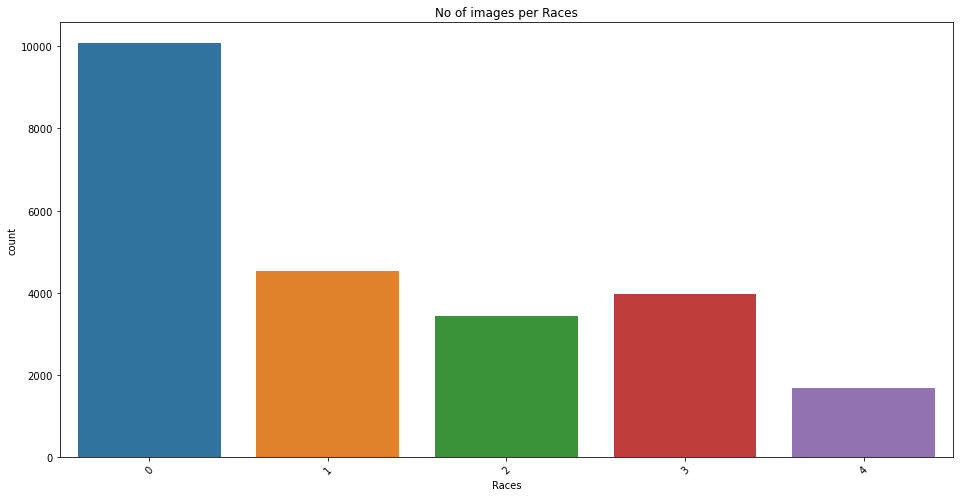

In [27]:
graph.univariate(df, 'Races')

From the bar chats above, the Whites, Blacks, Asians, Indians, and Other races are denoted by 0, 1, 2, 3 and 4 respectively.

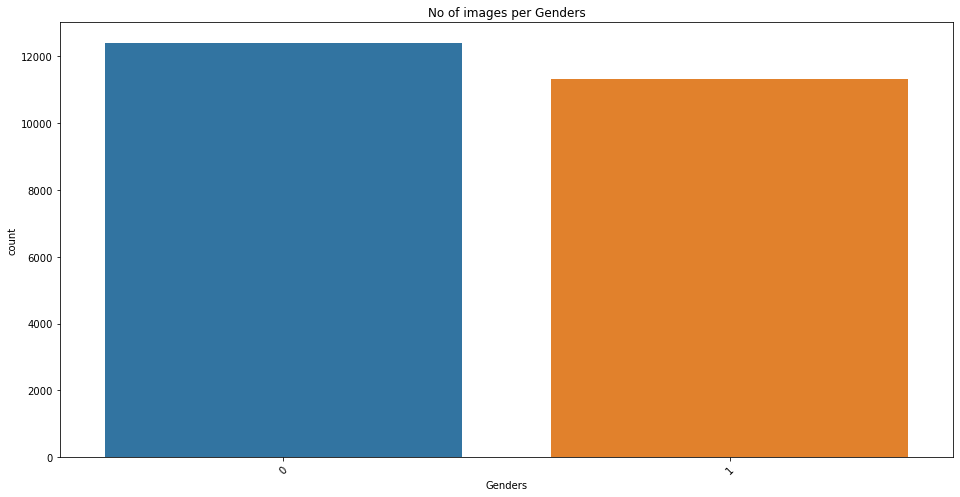

In [28]:
graph.univariate(df, 'Genders')

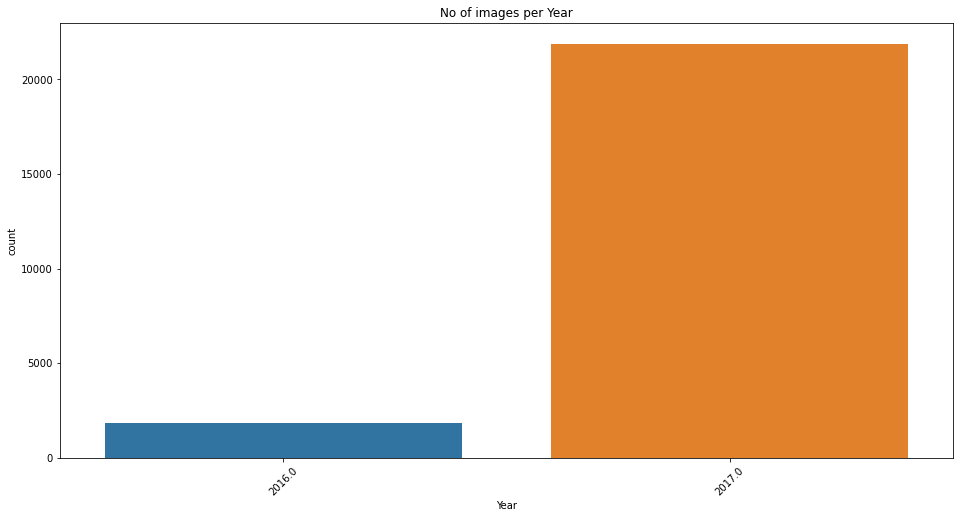

In [29]:
graph.univariate(df, 'Year')

The photos were taken across two years. The majority of the photos, 21883 were taken in 2017 while the remaining 1821 were taken in 2016.

0 represents males while 1 represents females.

In [30]:
col = 'Ages'

# Create the bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]

# Create the names for the bins
names = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70' , '71-80', '81-90', 'Above 90' ]

# Bin the data
df['Ages_binned'] = pd.cut(df[col], bins, labels=names)

# View the binned data
print(df['Ages_binned'])

0        Above 90
1        Above 90
2        Above 90
3        Above 90
4        Above 90
           ...   
23703        0-10
23704        0-10
23705        0-10
23706        0-10
23707        0-10
Name: Ages_binned, Length: 23705, dtype: category
Categories (10, object): ['0-10' < '11-20' < '21-30' < '31-40' ... '61-70' < '71-80' < '81-90' < 'Above 90']


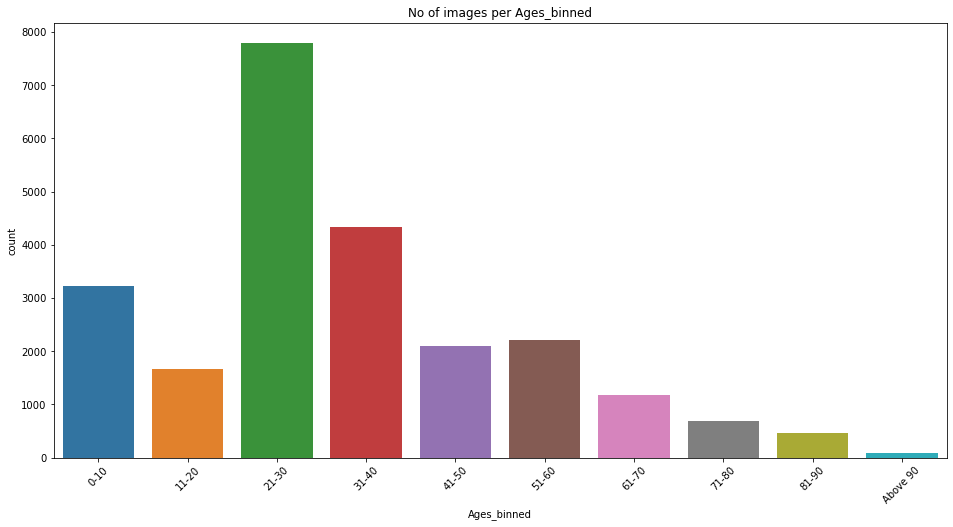

In [31]:
graph.univariate(df, 'Ages_binned')

The bar charts above illustrate the discripancies in the age distributions. The majority of the images came from 21 to 30 year old group followed by 31-40 years old group. Lesser images came from the old, above ninety years.

##### Bivariate Analysis

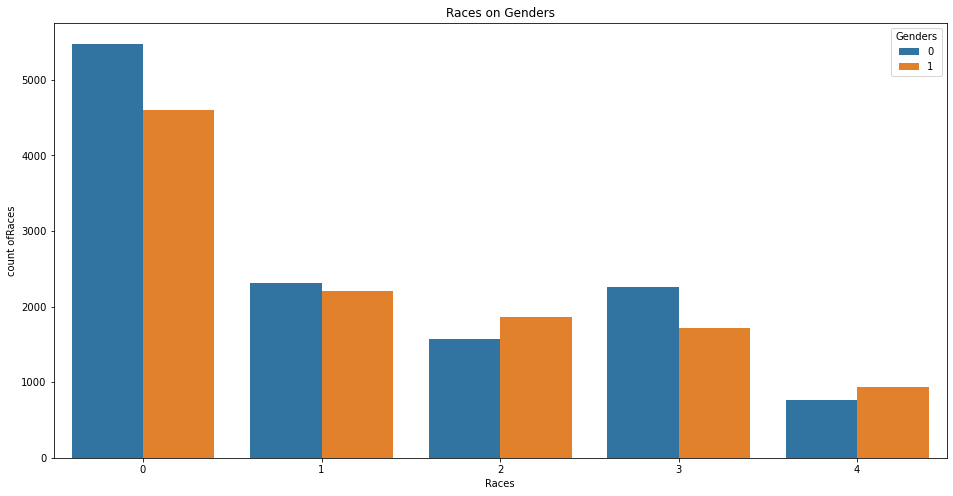

In [32]:
graph.bivariate(df, 'Races' , 'Genders')

While the data generally entails more males than females, the imbalance only reflects across three races; whites, blacks and Indians. The number of females across the remaining two groups are higher than that of men.

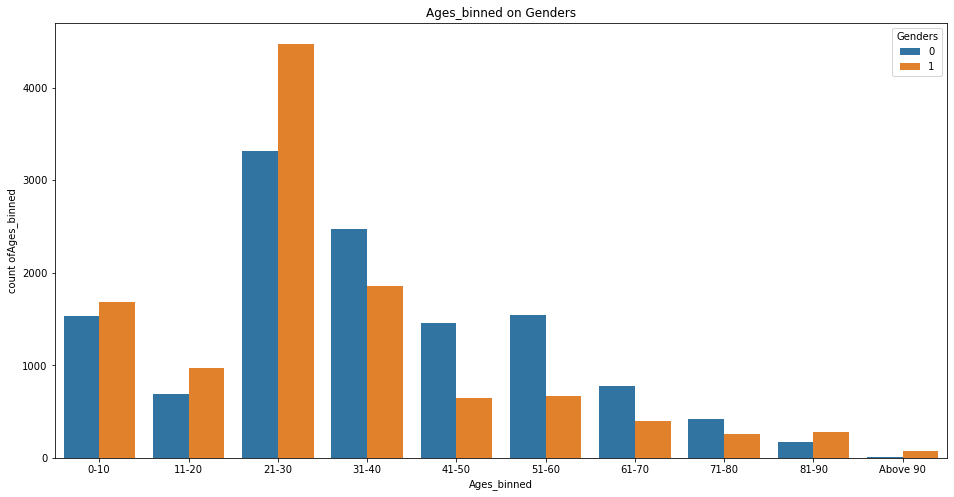

In [33]:
graph.bivariate(df, 'Ages_binned' , 'Genders')

Between class ages 0-10, 10-20, 21-30 and 81-90 there are more females compared to males while the remaining classes portray a differing trend. there are more females than males.

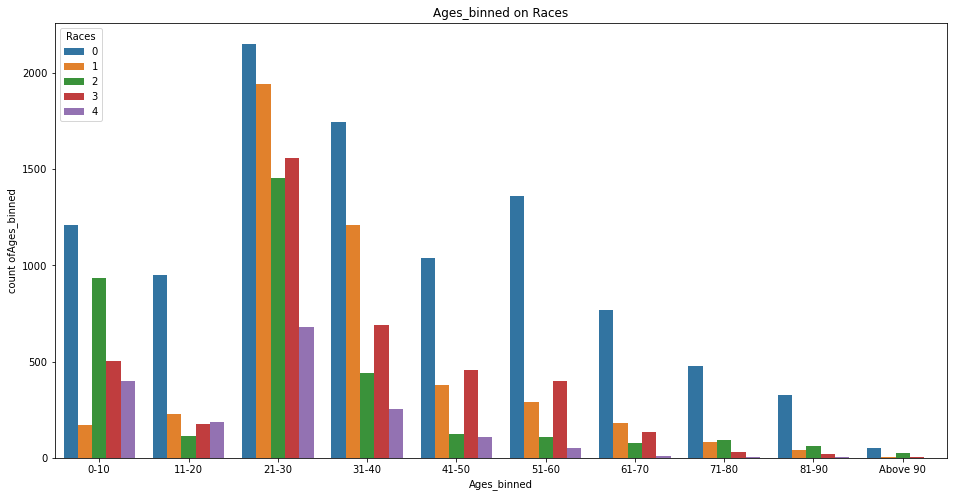

In [34]:
graph.bivariate(df, 'Ages_binned' , 'Races')

The whites are the majority in this dataset which is portrayed along all classes. 

#### Multivariate 

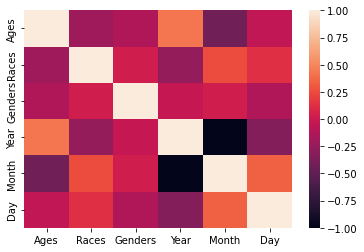

In [35]:
corr_matrix = df.corr()
# Plot a heatmap to visualize the correlations
sns.heatmap(corr_matrix);

Hi

## EVALUATION

## DEPLOYMENT